In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn import model_selection 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

### Função Para preparar o dados. 
Remove colunas de acordo com o Dataset e sempre remove linhas que tiverem pelo menos um dado faltando.

In [2]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    if(file_path == 'Student_performance_data _.csv'):
        df = df.drop(columns=['StudentID'])

    if(file_path == 'alzheimers_disease_data.csv'):
        df = df.drop(columns=['PatientID'])
        df = df.drop(columns=['DoctorInCharge'])

    if(file_path == 'UCI_Credit_Card.csv'):
        df = df.drop(columns=['ID'])
    
    if(file_path == 'Deepression.csv'):
        df = df.drop(columns=['Number'])

    if(file_path == 'cancer.csv'):
        df = df.drop(columns=['Unnamed: 32'])
        df = df.drop(columns=['id'])

    if(file_path == 'Recipe_Reviews_User_Feedback.csv'):
        df = df.drop(columns=['recipe_number']) #apenas o recipe_code é suficiente
        df = df.drop(columns=['recipe_name'])
        df = df.drop(columns=['comment_id']) #infos desnecessárias sobre o comentário e usuário
        df = df.drop(columns=['user_name'])
        df = df.drop(columns=['user_id'])
        df = df.drop(columns=['created_at'])
        df = df.drop(columns=['text']) #string complexa
    
    if (file_path == 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'):
        df = df.drop(columns = ['BMI']) #BMI e GenHlth são outliers, sua remoção simplifica a execução do algoritmo
        df = df.drop(columns = ['GenHlth'])

    missing_values = df.isnull().sum()

    if missing_values.any():
        df_cleaned = df.dropna()
        print("Linhas com valores ausentes foram removidas.")
    else:
        df_cleaned = df

    return df_cleaned

### Função para determinar qual é a coluna de rótulo
No geral, a label column é a última, mas pode variar dependendo do dataset

In [3]:
def detect_label_column(df, file_path):
    if(file_path == 'cancer.csv' or file_path == 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'):
        label_column = df.columns[0]
    else:
        label_column = df.columns[-1]

    return label_column

### Função para transformar os dados da label em inteiros. 
Essa função serve para transformar os dados da label em inteiros, caso eles sejam String.

In [4]:
def encode_labels(y):
    if y.dtype == 'object':
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
    else:
        y_encoded = y
    
    return y_encoded

### Função para desenhar os gráficos

Essa função recebe o vetor contendo a média das acurácias de cada dataset e plota isso em um gráfico

In [5]:
def plot_mean_accuracy_graph(mean_accuracies, file_paths):
    num_datasets = len(mean_accuracies)
    x_positions = np.arange(num_datasets)

    plt.bar(x_positions, mean_accuracies, color='blue')
    plt.xticks(x_positions, file_paths, rotation=45)
    plt.xlabel('Conjunto de Dados')
    plt.ylabel('Acurácia Média')
    plt.title('Acurácia Média do Classificador por Conjunto de Dados')
    plt.show()

### Função que faz aplica Regressão Logística

basicamente a função recebe um dataset e aplica regressão logística usando K-Folds

In [6]:
def run_logistic_regression_evaluation(file_path):
    df = load_and_prepare_data(file_path)

    label_column = detect_label_column(df, file_path)

    X = df.drop(columns=[label_column])
    y = df[label_column]

    y_encoded = encode_labels(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    accuracies = []

    logisticRegression = LogisticRegression(max_iter=200)

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        logisticRegression.fit(X_train, y_train)
        accuracy = logisticRegression.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Acurácias de cada fold: {accuracies}")
    mean_accuracy = np.mean(accuracies)

    return mean_accuracy

### Função que faz aplica Arvore de Decisão

basicamente a função recebe um dataset e aplica regressão logística usando K-Folds

In [7]:
def run_tree_decision(file_path):
    # Carrega e prepara os dados
    df = load_and_prepare_data(file_path)
    
    label_column = detect_label_column(df, file_path)

    X = df.drop(columns=[label_column])
    y = df[label_column]

    y_encoded = encode_labels(y)

    accuracies = []
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    decidion_tree = tree.DecisionTreeClassifier()

    kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_scaled, y_encoded):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        
    
        # Treinar o modelo
        decidion_tree.fit(X_train, y_train)
        
    
        # Avaliar a precisão do modelo
        accuracy = decidion_tree.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Acurácias de cada fold: {accuracies}")
    mean_accuracy = np.mean(accuracies)


    return mean_accuracy

### Função que aplica Naïve Bayes

basicamente a função recebe um dataset e aplica Naïve Bayes usando K-Folds

In [8]:
def run_naive_bayes(file_path):
    # Carrega e prepara os dados
    df = load_and_prepare_data(file_path)
    
    label_column = detect_label_column(df, file_path)

    X = df.drop(columns=[label_column])
    y = df[label_column]

    y_encoded = encode_labels(y)

    accuracies = []
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    gnb = GaussianNB()

    kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_scaled, y_encoded):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        
    
        # Treinar o modelo
        gnb.fit(X_train, y_train)
        
    
        # Avaliar a precisão do modelo
        accuracy = gnb.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Acurácias de cada fold: {accuracies}")
    mean_accuracy = np.mean(accuracies)


    return mean_accuracy

In [9]:
def run_tree_decision(file_path):
    # Carrega e prepara os dados
    df = load_and_prepare_data(file_path)
    
    label_column = detect_label_column(df, file_path)

    X = df.drop(columns=[label_column])
    y = df[label_column]

    y_encoded = encode_labels(y)

    accuracies = []
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    decidion_tree = tree.DecisionTreeClassifier()

    kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_scaled, y_encoded):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        
    
        # Treinar o modelo
        decidion_tree.fit(X_train, y_train)
        
    
        # Avaliar a precisão do modelo
        accuracy = decidion_tree.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Acurácias de cada fold: {accuracies}")
    mean_accuracy = np.mean(accuracies)


    return mean_accuracy

### Função responsável principal Da Regresão Logistica

Essa função é a responsável por chamar a função que aplica regressão logística para todos os datasets e após isso, chama a função para plotar os gráficos

In [10]:
def mainLogisticRegression(mean_accuracies, file_paths):
    for file_path in file_paths:
        mean_accuracy = run_logistic_regression_evaluation(file_path)
        mean_accuracies.append(mean_accuracy)

    for i, mean_accuracy in enumerate(mean_accuracies):
        print(f"Acurácia média para {file_paths[i]}: {mean_accuracy:.2f}")

    plot_mean_accuracy_graph(mean_accuracies, file_paths)

### Função responsável principal Da Arvore

Essa função é a responsável por chamar a função que aplica regressão logística para todos os datasets e após isso, chama a função para plotar os gráficos

In [11]:
def mainTreeDecision(mean_accuracies, file_paths):
    for file_path in file_paths:
        mean_accuracy = run_tree_decision(file_path)
        mean_accuracies.append(mean_accuracy)

    for i, mean_accuracy in enumerate(mean_accuracies):
        print(f"Acurácia média para {file_paths[i]}: {mean_accuracy:.2f}")

    plot_mean_accuracy_graph(mean_accuracies, file_paths)

### Função responsável principal Do Naïve Bayes

Essa função é a responsável por chamar a função que aplica regressão logística para todos os datasets e, após isso, chama a função para plotar os gráficos

In [12]:
def mainNaiveBayes(mean_accuracies, file_paths):
    for file_path in file_paths:
        mean_accuracy = run_naive_bayes(file_path)
        mean_accuracies.append(mean_accuracy)

    for i, mean_accuracy in enumerate(mean_accuracies):
        print(f"Acurácia média para {file_paths[i]}: {mean_accuracy:.2f}")

    plot_mean_accuracy_graph(mean_accuracies, file_paths)

### Não é uma função
Apenas inicializa as váriaveis e chama as funções necessárias

Acurácias de cada fold: [0.575, 0.54375, 0.528125, 0.56875, 0.5799373040752351]
Acurácias de cada fold: [0.7207792207792207, 0.8181818181818182, 0.7597402597402597, 0.738562091503268, 0.738562091503268]
Acurácias de cada fold: [0.9649122807017544, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9646017699115044]
Acurácias de cada fold: [0.8390243902439024, 0.848780487804878, 0.8439024390243902, 0.8048780487804879, 0.7951219512195122]
Acurácias de cada fold: [0.419, 0.3655, 0.369, 0.383, 0.36533333333333334]
Acurácias de cada fold: [0.37962962962962965, 0.25, 0.3333333333333333, 0.3611111111111111, 0.35185185185185186]
Acurácias de cada fold: [0.8079331941544885, 0.7494780793319415, 0.7594142259414226, 0.7845188284518828, 0.7907949790794979]
Acurácias de cada fold: [0.786046511627907, 0.7953488372093023, 0.8116279069767441, 0.7883720930232558, 0.8065268065268065]


C:\Users\Dev18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Acurácias de cada fold: [0.7742645037118504, 0.778113830079736, 0.7824532453245324, 0.7769526952695269, 0.7791529152915292]
Acurácias de cada fold: [0.7018176674446567, 0.6969375486243723, 0.7064648465129438, 0.7031404724855, 0.7073136228603762]
Acurácia média para winequality-red.csv: 0.56
Acurácia média para diabetes.csv: 0.76
Acurácia média para cancer.csv: 0.94
Acurácia média para heart.csv: 0.83
Acurácia média para UCI_Credit_Card.csv: 0.38
Acurácia média para Deepression.csv: 0.34
Acurácia média para Student_performance_data _.csv: 0.78
Acurácia média para alzheimers_disease_data.csv: 0.80
Acurácia média para Recipe_Reviews_User_Feedback.csv: 0.78
Acurácia média para diabetes_binary_5050split_health_indicators_BRFSS2015.csv: 0.70


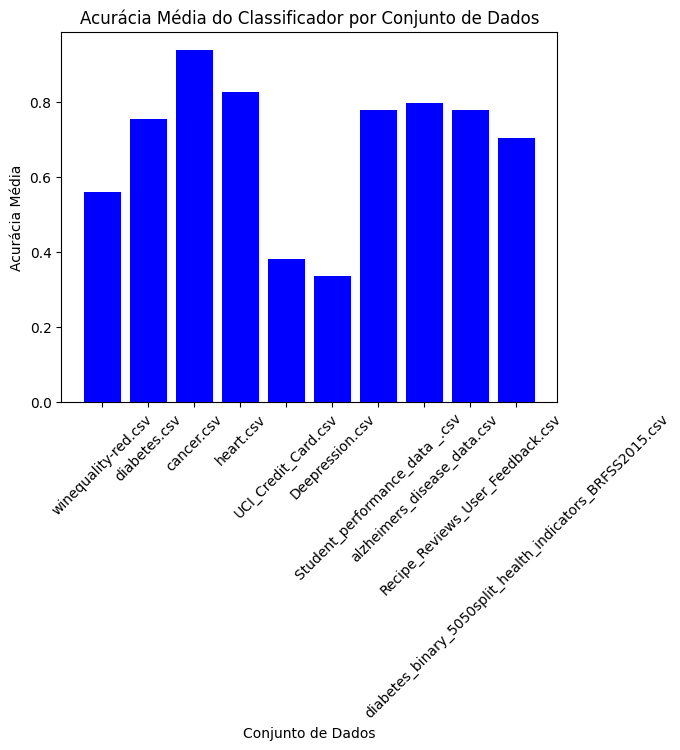

In [14]:
file_paths = ['winequality-red.csv', 'diabetes.csv', 'cancer.csv', 'heart.csv', 'UCI_Credit_Card.csv', 'Deepression.csv','Student_performance_data _.csv', 'alzheimers_disease_data.csv', 'Recipe_Reviews_User_Feedback.csv', 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv']






mean_accuracies_Logistic = []
mean_accuracies_Tree = []
mean_accuracies_NB = []

#mainLogisticRegression(mean_accuracies_Logistic, file_paths)
#mainTreeDecision(mean_accuracies_Tree, file_paths)
mainNaiveBayes(mean_accuracies_NB, file_paths)
